<a href="https://colab.research.google.com/github/labibfarhan9468/PDS-10-Project/blob/main/PDS_10_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# PREDICTION OF A LAPTOP PRICE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/sample_data/Laptop_price.csv')
lptp = pd.DataFrame(data)

In [7]:
lptp.head(2)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919


In [8]:
lptp['Brand'] = lptp['Brand'].map({'Asus': 0,'Acer':1,'Dell':2,'HP':3,'Lenovo':4})

In [9]:
lptp.head(2)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,0,3.830296,16,512,11.185147,2.641094,17395.093065
1,1,2.912833,4,1000,11.311372,3.260012,31607.605919


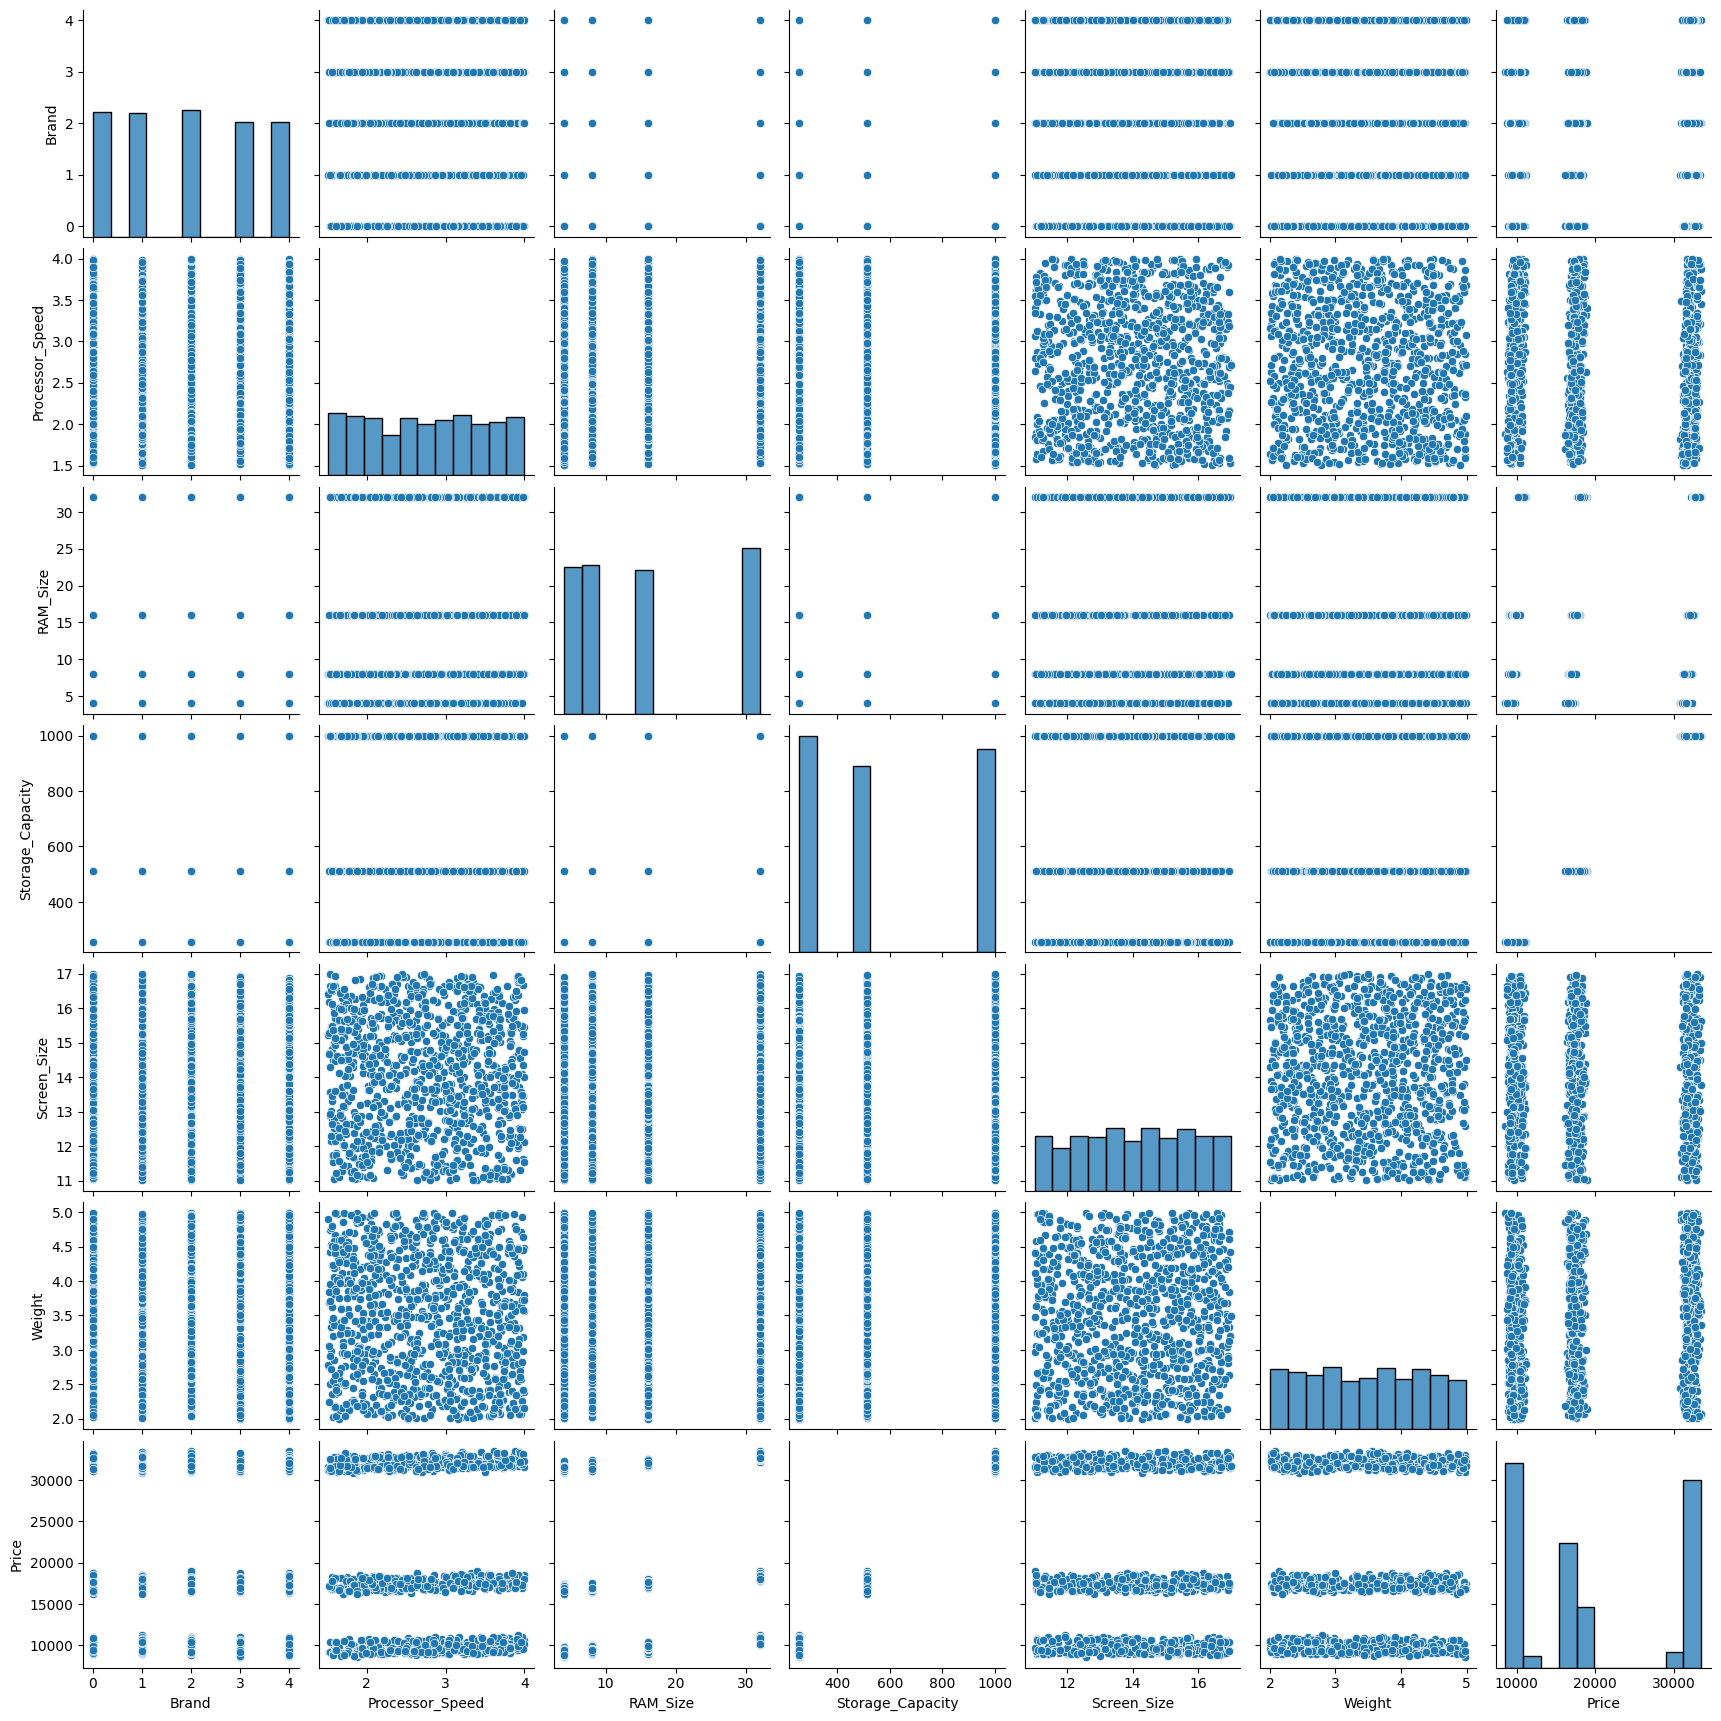

In [10]:
sns.pairplot(lptp)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [12]:
model = LinearRegression()

In [13]:
lptp.sample(2)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
207,4,3.330562,4,512,11.169868,2.677183,16609.821359
681,1,3.405713,8,1000,16.547135,4.613755,32038.621807


In [14]:
X_train,X_test,Y_train,Y_test= train_test_split(lptp[['Brand','Processor_Speed','RAM_Size','Storage_Capacity','Screen_Size','Weight']],lptp['Price'],train_size=.9,random_state =42)

In [15]:
Y_pred = model.fit(X_train,Y_train).predict(X_test)

In [16]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y_test != Y_pred).sum()))

Number of mislabeled points out of a total 100 points : 100


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape
    }

calculate_metrics (Y_test, Y_pred)

{'MAE': 140.80148964693134,
 'MSE': 29935.65785544258,
 'RMSE': 173.0192412867499,
 'MAPE': 0.9146085855849464}

In [18]:
# IF I WANT TO PREDICT THE COMPANY OF A LAPTOP (A CLASSIFICATION PROBLEM)

In [19]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB()
X1_train,X1_test,Y1_train,Y1_test= train_test_split(lptp[['Processor_Speed','RAM_Size','Storage_Capacity','Screen_Size','Weight','Price']],lptp['Brand'],train_size=.9,random_state =42)



In [20]:
Y1_pred = model1.fit(X1_train,Y1_train).predict(X1_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(Y1_test, Y1_pred))
print(classification_report(Y1_test, Y1_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y1_test != Y1_pred).sum()))

Accuracy: 0.26
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        22
           1       0.13      0.25      0.17        12
           2       0.26      0.43      0.33        23
           3       0.22      0.08      0.12        24
           4       0.25      0.11      0.15        19

    accuracy                           0.26       100
   macro avg       0.25      0.26      0.24       100
weighted avg       0.27      0.26      0.24       100

Number of mislabeled points out of a total 100 points : 74


In [22]:
#LET'S USE SOME OTHER MODELS TO PREDICT COMPANY
#RANDOM FOREST CLASSIFIER

In [23]:
from sklearn.ensemble import RandomForestClassifier

model2= RandomForestClassifier()
Y1_pred = model2.fit(X1_train,Y1_train).predict(X1_test)
print("Accuracy:", accuracy_score(Y1_test, Y1_pred))
print(classification_report(Y1_test, Y1_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y1_test != Y1_pred).sum()))

Accuracy: 0.18
              precision    recall  f1-score   support

           0       0.19      0.14      0.16        22
           1       0.12      0.25      0.17        12
           2       0.11      0.09      0.10        23
           3       0.26      0.21      0.23        24
           4       0.22      0.26      0.24        19

    accuracy                           0.18       100
   macro avg       0.18      0.19      0.18       100
weighted avg       0.19      0.18      0.18       100

Number of mislabeled points out of a total 100 points : 82


In [24]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
Y1_pred = model3.fit(X1_train,Y1_train).predict(X1_test)
print("Accuracy:", accuracy_score(Y1_test, Y1_pred))
print(classification_report(Y1_test, Y1_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y1_test != Y1_pred).sum()))


Accuracy: 0.18
              precision    recall  f1-score   support

           0       0.24      0.41      0.30        22
           1       0.09      0.25      0.13        12
           2       0.19      0.22      0.20        23
           3       0.00      0.00      0.00        24
           4       0.33      0.05      0.09        19

    accuracy                           0.18       100
   macro avg       0.17      0.19      0.15       100
weighted avg       0.17      0.18      0.15       100

Number of mislabeled points out of a total 100 points : 82


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [25]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()

Y1_pred = model4.fit(X1_train,Y1_train).predict(X1_test)
print("Accuracy:", accuracy_score(Y1_test, Y1_pred))
print(classification_report(Y1_test, Y1_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (Y1_test != Y1_pred).sum()))


Accuracy: 0.18
              precision    recall  f1-score   support

           0       0.14      0.09      0.11        22
           1       0.26      0.42      0.32        12
           2       0.17      0.17      0.17        23
           3       0.11      0.08      0.10        24
           4       0.19      0.26      0.22        19

    accuracy                           0.18       100
   macro avg       0.18      0.21      0.19       100
weighted avg       0.17      0.18      0.17       100

Number of mislabeled points out of a total 100 points : 82
